# Model Testing Code

This code is used to test the model with your own video and generates relative results and figure at the end.

## Step1: Put OpenPose json files in a seperate folder.

## Step2: Enter Input File Name and Json Path Here

Note: Please keep original file name for OpenPose generated jsons and do not rename them. File name of OpenPose jsons must contain the filename of the video to be matched.

In [1]:
vid='a2.mp4' #filename of the video. Either path relative to this notebook or absolute path
json_path='a2_json/' #path to the DIRECTORY to the OpenPose jsons corresponding to this video

## Step3: Then press shift+enter till the end of the document. Result will be saved to 'result/'

## Load Model

Please put model folder (named hmdbmodel2) in the same directory with this file.

In [2]:
from os import listdir
from os.path import isfile
import numpy as np
import json
import collections
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from file_processor import process_one_file
import tensorflow as tf

In [3]:
model = tf.keras.models.load_model('proj6lstm')

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  multiple                  314368    
_________________________________________________________________
dense (Dense)                multiple                  514       
Total params: 314,882
Trainable params: 314,882
Non-trainable params: 0
_________________________________________________________________


## Preprocess Video

In [5]:
temporal_dim=10

In [6]:
X=process_one_file(vid,json_path,temporal_dim)

a2 a2_json/


In [7]:
X.shape

(272, 10, 50)

In [9]:
y_pred=model.predict(X)
json_out={}
result_list=[]
for i in range(y_pred.shape[0]):
    result_list.append([(i/30),y_pred[i,0]])
json_out["punch"]=result_list
with open('result/'+vid+'.json', 'w+') as outfile:
    json.dump(str(json_out), outfile)

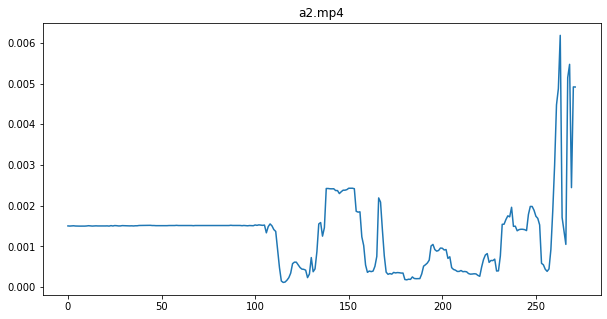

In [12]:
plt.figure(figsize=(10,5))
plt.plot(y_pred[:,1])
plt.title(vid)
plt.savefig('result/'+vid+'.png')

## Result json and plot will be saved in 'result/' folder